# Gravitational Orbits in Cartesian Coordinates   

## Euler-Lagrange Equation

Suppose one has a system consisting of two masses $m_1$ and $m_2$ only subject to the gravitational force between them. Suppose the first mass has position $(x_1, y_1)$ and the second mass has position $(x_2, y_2)$. The total potential energy of the system is given by

$$\begin{align*}
    U(x_1, y_1, x_2, y_2) = -\frac{G m_1 m_2}{\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}}
\end{align*}$$

Furthermore, the total kinetic energy of the system is given by

$$\begin{align*}
    T = \frac{m_1}{2} \left(\dot x_1^2 + \dot y_1^2 + \right) + \frac{m_2}{2} \left(\dot x_2^2 + \dot y_2^2\right)
\end{align*}$$

The Lagrangian with generalized coordinates $x_1, x_2, y_1, y_2$ is given by $\mathcal{L} = T - U$, or, in more explicit terms,

$$\begin{align*}
    \mathcal{L} = \frac{m_1}{2} \left(\dot x_1^2 + \dot y_1^2 \right) + \frac{m_2}{2} \left(\dot x_2^2 + \dot y_2^2\right) + \frac{G m_1 m_2}{\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}}
\end{align*}$$

To solve for the motion of the two masses, we need to solve the system of Euler-Lagrange equations

$$\begin{align*}
    \frac{d}{dt}\frac{\partial \mathcal{L}}{\partial \dot x_i} &= \frac{\partial \mathcal{L}}{\partial x_i} \\
    \frac{d}{dt}\frac{\partial \mathcal{L}}{\partial \dot y_i} &= \frac{\partial \mathcal{L}}{\partial y_i}  
\end{align*}$$

for $i \in \{1, 2\}$. Writing out the equations explicitly, one gets

$$\begin{align*}
    m_1 \ddot x_1 &= \frac{Gm_1 m_2 (x_2 - x_1)}{\left((x_2 - x_1)^2 + (y_2 - y_1)^2\right)^{3/2}} \implies \ddot x_1 = \frac{Gm_2 (x_2 - x_1)}{\left((x_2 - x_1)^2 + (y_2 - y_1)^2\right)^{3/2}} \\
    m_1 \ddot y_1 &= \frac{Gm_1 m_2 (y_2 - y_1)}{\left((x_2 - x_1)^2 + (y_2 - y_1)^2\right)^{3/2}} \implies \ddot y_1 = \frac{Gm_2 (y_2 - y_1)}{\left((x_2 - x_1)^2 + (y_2 - y_1)^2\right)^{3/2}} \\
    m_1 \ddot x_2 &= \frac{Gm_1 m_2 (x_1 - x_2)}{\left((x_2 - x_1)^2 + (y_2 - y_1)^2\right)^{3/2}} \implies \ddot x_2 = \frac{Gm_1 (x_1 - x_2)}{\left((x_2 - x_1)^2 + (y_2 - y_1)^2\right)^{3/2}} \\
    m_1 \ddot x_2 &= \frac{Gm_1 m_2 (y_1 - y_2)}{\left((x_2 - x_1)^2 + (y_2 - y_1)^2\right)^{3/2}} \implies \ddot y_2 = \frac{Gm_1 (y_1 - y_2)}{\left((x_2 - x_1)^2 + (y_2 - y_1)^2\right)^{3/2}} \\
\end{align*}$$

For the sake of convenience, let
    $$r \equiv \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$
    
Of course, when using solve_ivp, we need to express the system of four second-order differential equations as a system of eight first-order differential equations just like in the Double Pendulum notebook.

In [141]:
%matplotlib inline

In [142]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [143]:
# Adjust dpi
plt.rcParams['figure.dpi'] = 100.    # Default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

## Gravitational Orbit Class and Utility Functions

In [144]:
class GravitationalOrbit():
    """
    GravitationalOrbit class implements the parameters and Lagrange's equations for 
    two orbiting masses.
     
    Parameters
    ----------
    G : float
        Gravitational constant
    m_1 : float
        mass of the first object
    m_2 : float
        mass of the second object

    """

    """
    Methods
    -------
    """
    def __init__(self, G = 1., m_1 = 1., m_2 = 1.):
        self.G = G
        self.m_1 = m_1
        self.m_2 = m_2
    

    """
    dy_dt(t, y)
    Returns the right side of the differential equation in vector y, 
    given time t and the corresponding value of y.
    """
    def dy_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        z : float
            time 
        z : float
            A 8-component vector with 
                z[0] = x_1(t) and z[1] = x_1_dot(t),
                z[2] = y_1(t) and z[3] = y_1_dot(t)
                z[4] = x_2(t) and z[5] = x_2_dot(t), 
                z[6] = y_2(t) and z[7] = y_2_dot(t)
            
        Returns
        -------
        
        """

        r = np.sqrt((z[4] - z[0])**2 + (z[6] - z[2])**2)
        x_1_dot = z[1] 
        x_1_ddot = self.G * self.m_2 * (z[4] - z[0]) / (r**3)
        y_1_dot = z[3]
        y_1_ddot = self.G * self.m_2 * (z[6] - z[2]) / (r**3)
        x_2_dot = z[5]
        x_2_ddot = self.G * self.m_1 * (z[0] - z[4]) / (r**3)
        y_2_dot = z[7]
        y_2_ddot = self.G * self.m_1 * (z[2] - z[6]) / (r**3)

        return x_1_dot, x_1_ddot, y_1_dot, y_1_ddot, \
                x_2_dot, x_2_ddot, y_2_dot, y_2_ddot
    

    def solve_ode(self, t_pts, z_0, abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """ 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             z_0, t_eval=t_pts,
                             atol=abserr, rtol=relerr)
        x_1, x_1_dot, y_1, y_1_dot, x_2, x_2_dot, y_2, y_2_dot = solution.y

        return x_1, x_1_dot, y_1, y_1_dot, x_2, x_2_dot, y_2, y_2_dot

In [145]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False, 
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [146]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Simple Orbital Plot

We will now use the GravitationalOrbit class to plot some simple orbits with some generic initial conditions (with the added condition that the center of mass is initially stationary and at the origin).

In [147]:
# Common plotting parameters
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end + delta_t, delta_t)

G = 1.
m_1 = 1.
m_2 = 6.


# Instantiate a gravitational system
o1 = GravitationalOrbit(G = G, m_1 = m_1, m_2 = m_2)

(<AxesSubplot:xlabel='$x$', ylabel='$y$'>,
 <matplotlib.lines.Line2D at 0x29800bf9810>)

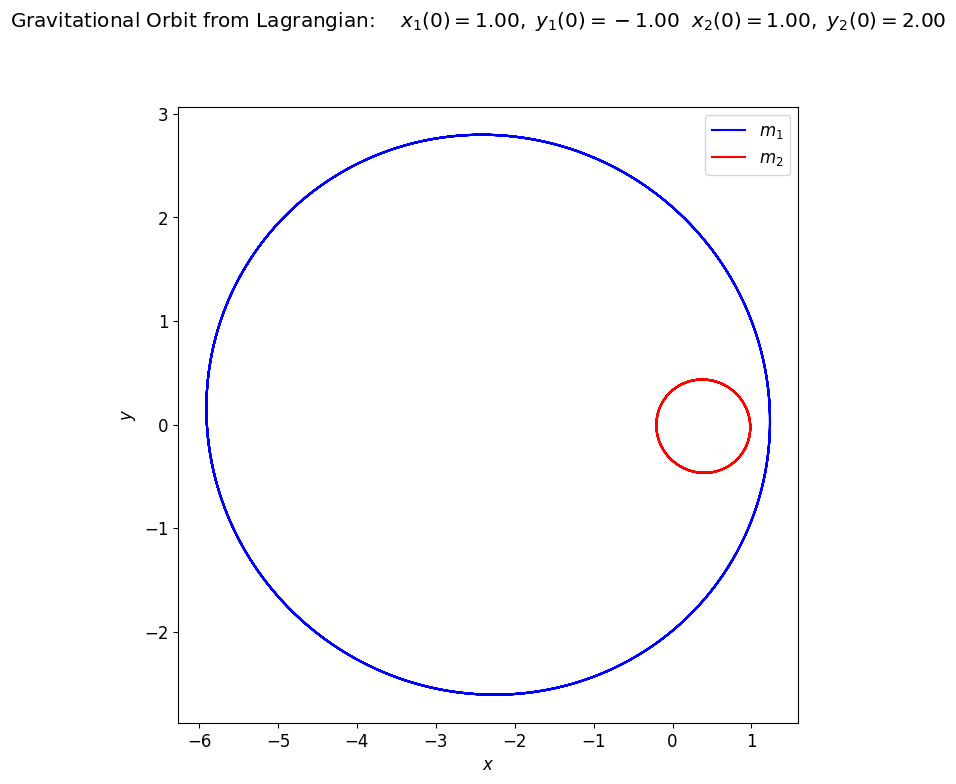

In [148]:
# Initial conditions
x_1_0 = 1.
x_1_dot_0 = -1.
y_1_0 = 1.
y_1_dot_0 = 2.

# choose parameters for center of mass to be stationary at the origin
x_2_0 = -(m_1/m_2) * x_1_0
x_2_dot_0 = -(m_1/m_2) * x_1_dot_0
y_2_0 = -(m_1/m_2) * y_1_0
y_2_dot_0 = -(m_1/m_2) * y_1_dot_0


z_0 = [x_1_0, x_1_dot_0, y_1_0, y_1_dot_0,  
       x_2_0, x_2_dot_0, y_2_0, y_2_dot_0]

x_1, x_1_dot, y_1, y_1_dot, x_2, x_2_dot, y_2, y_2_dot = o1.solve_ode(t_pts, z_0)


# Start plot
# Labels for individual plot axes
pos_vs_time = (r'$x$', r'$y$')

fig = plt.figure(figsize = (8, 8))
overall_title = 'Gravitational Orbit from Lagrangian:  ' + \
                rf'  $x_1(0) = {x_1_0:.2f},$' + \
                rf' $y_1(0) = {x_1_dot_0:.2f}$' + \
                rf'  $x_2(0) = {y_1_0:.2f},$' + \
                rf' $y_2(0) = {y_1_dot_0:.2f}$' 
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)
start, stop = start_stop_indices(t_pts, t_start, t_end)

plot_y_vs_x(x_1[start : stop], y_1[start : stop], 
            axis_labels = pos_vs_time,
            color = 'blue', 
            label = r'$m_1$', 
            ax = ax_a)

plot_y_vs_x(x_2[start : stop], y_2[start : stop], 
            axis_labels = pos_vs_time,
            color = 'red', 
            label = r'$m_2$', 
            ax = ax_a)


## Limiting mass cases

Suppose we have a system where, without loss of generality, $m_2 >> m_1$. We desire to show emperically that the orbit of $m_1$ in the rest frame of $m_2$ approaches the orbit of the 'relative' particle with reduced mass $\mu = \frac{m_1 m_2}{m_1 + m_2}$
in the CM frame. Suppose, for the sake of this example, that the velocity of the center of mass $\mathbf{R} = 0$. If $\mathbf{r}$ is the relative position, the position of the particle with mass $m_1$ with respect to the rest frame is given by

$$\begin{align*}
    \mathbf{r_1} = \mathbf{R} + \frac{m_2}{m_1 + m_2} \mathbf{r} = \frac{m_2}{m_1 + m_2} \mathbf{r}  \longrightarrow \mathbf{r}  \qquad \text{ if }  m_2 >> m_1
\end{align*}$$

Likewise, the position of the particle with mass $m_2$ with respect to the rest frame is given by

$$\begin{align*}
    \mathbf{r_2} = \mathbf{R} + \frac{m_1}{m_1 + m_2} \mathbf{r} = \frac{m_1}{m_1 + m_2} \mathbf{r}  \longrightarrow 0  \qquad \text{ if }  m_2 >> m_1
\end{align*}$$

Furthermore, one can note that

$$\begin{align*}
    \mu = \frac{m_1 m_2}{m_1 + m_2} \longrightarrow m_1 \qquad \text{ if } m_2 >> m_1
\end{align*}$$

so in cases where $m_2 >> m_1$, $\mathbf{R} = 0$, and $\mathbf{\dot R} = 0$, the orbit of the particle with mass $m_1$ converges to the orbit of the relative particle in the CM frame, while the path taken by the particle with mass $m_2$ remains closer to the origin. We can see this phenomena clearly by plotting a couple more orbits. First, suppose $m_2 / m_1 = 30$.

In [149]:
# Common plotting parameters
t_start = 0.
t_end = 20.
delta_t = 0.01

t_pts = np.arange(t_start, t_end + delta_t, delta_t)

G = 1.
m_1 = 1.
m_2 = 30. # m_2 >> m_1


# Instantiate a gravitational system
o1 = GravitationalOrbit(G = G, m_1 = m_1, m_2 = m_2)

(<AxesSubplot:xlabel='$x$', ylabel='$y$'>,
 <matplotlib.lines.Line2D at 0x29800aa0160>)

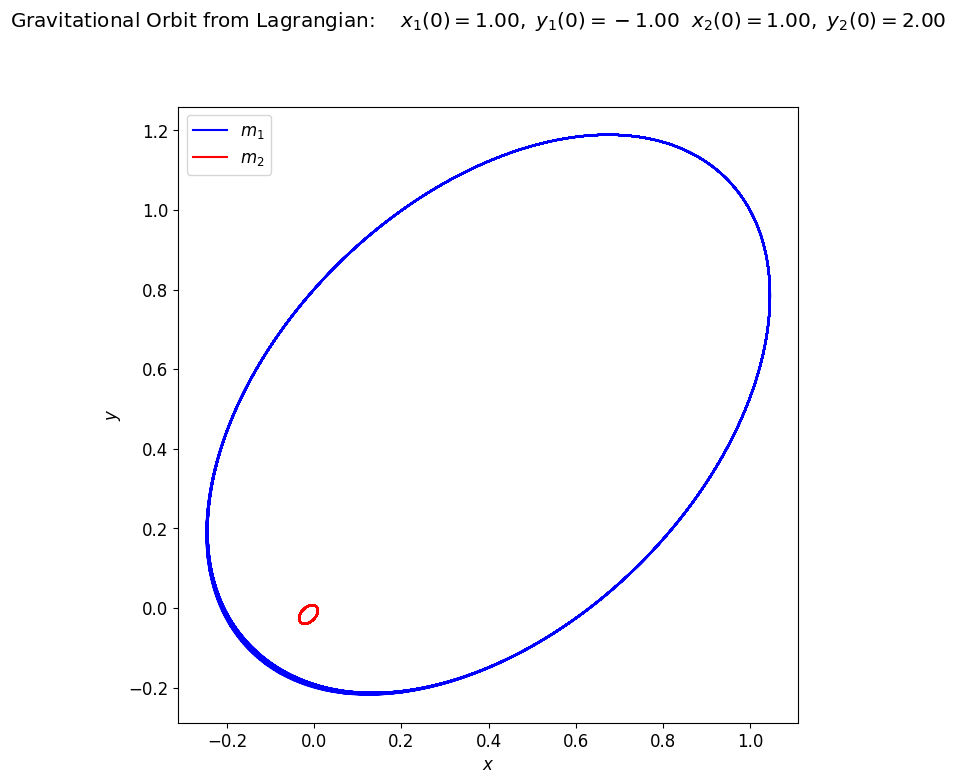

In [150]:
# Initial conditions
x_1_0 = 1.
x_1_dot_0 = -1.
y_1_0 = 1.
y_1_dot_0 = 2.

# choose parameters for center of mass to be stationary at the origin
x_2_0 = -(m_1/m_2) * x_1_0
x_2_dot_0 = -(m_1/m_2) * x_1_dot_0
y_2_0 = -(m_1/m_2) * y_1_0
y_2_dot_0 = -(m_1/m_2) * y_1_dot_0


z_0 = [x_1_0, x_1_dot_0, y_1_0, y_1_dot_0,  
       x_2_0, x_2_dot_0, y_2_0, y_2_dot_0]

x_1, x_1_dot, y_1, y_1_dot, x_2, x_2_dot, y_2, y_2_dot = o1.solve_ode(t_pts, z_0)


# Start plot
# Labels for individual plot axes
pos_vs_time = (r'$x$', r'$y$')

fig = plt.figure(figsize = (8, 8))
overall_title = 'Gravitational Orbit from Lagrangian:  ' + \
                rf'  $x_1(0) = {x_1_0:.2f},$' + \
                rf' $y_1(0) = {x_1_dot_0:.2f}$' + \
                rf'  $x_2(0) = {y_1_0:.2f},$' + \
                rf' $y_2(0) = {y_1_dot_0:.2f}$' 
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)
start, stop = start_stop_indices(t_pts, t_start, t_end)

plot_y_vs_x(x_1[start : stop], y_1[start : stop], 
            axis_labels = pos_vs_time,
            color = 'blue', 
            label = r'$m_1$', 
            ax = ax_a)

plot_y_vs_x(x_2[start : stop], y_2[start : stop], 
            axis_labels = pos_vs_time,
            color = 'red', 
            label = r'$m_2$', 
            ax = ax_a)

Now, let us consider a case where $m_2 / m_1 = 100$. 

In [151]:
# Common plotting parameters
t_start = 0.
t_end = 20.
delta_t = 0.001

t_pts = np.arange(t_start, t_end + delta_t, delta_t)

G = 1.
m_1 = 1.
m_2 = 100. # m_2 >> m_1


# Instantiate a gravitational system
o1 = GravitationalOrbit(G = G, m_1 = m_1, m_2 = m_2)

(<AxesSubplot:xlabel='$x$', ylabel='$y$'>,
 <matplotlib.lines.Line2D at 0x29806746fe0>)

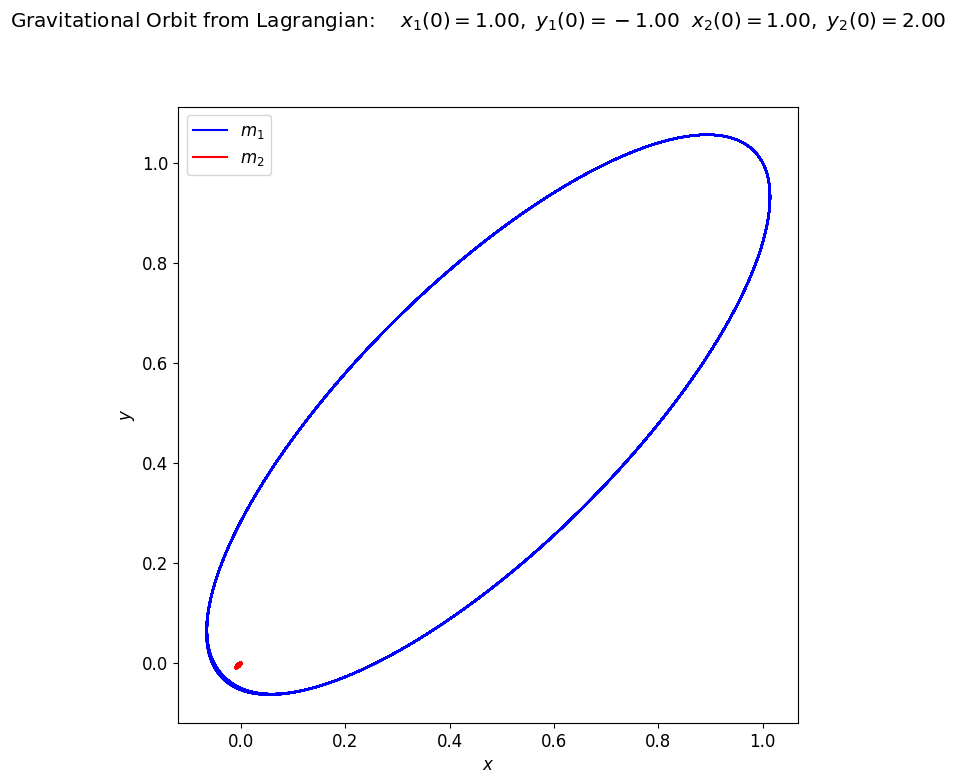

In [152]:
# Initial conditions
x_1_0 = 1.
x_1_dot_0 = -1.
y_1_0 = 1.
y_1_dot_0 = 2.

# choose parameters for center of mass to be stationary at the origin
x_2_0 = -(m_1/m_2) * x_1_0
x_2_dot_0 = -(m_1/m_2) * x_1_dot_0
y_2_0 = -(m_1/m_2) * y_1_0
y_2_dot_0 = -(m_1/m_2) * y_1_dot_0


z_0 = [x_1_0, x_1_dot_0, y_1_0, y_1_dot_0,  
       x_2_0, x_2_dot_0, y_2_0, y_2_dot_0]

x_1, x_1_dot, y_1, y_1_dot, x_2, x_2_dot, y_2, y_2_dot = o1.solve_ode(t_pts, z_0)


# Start plot
# Labels for individual plot axes
pos_vs_time = (r'$x$', r'$y$')

fig = plt.figure(figsize = (8, 8))
overall_title = 'Gravitational Orbit from Lagrangian:  ' + \
                rf'  $x_1(0) = {x_1_0:.2f},$' + \
                rf' $y_1(0) = {x_1_dot_0:.2f}$' + \
                rf'  $x_2(0) = {y_1_0:.2f},$' + \
                rf' $y_2(0) = {y_1_dot_0:.2f}$' 
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)
start, stop = start_stop_indices(t_pts, t_start, t_end)

plot_y_vs_x(x_1[start : stop], y_1[start : stop], 
            axis_labels = pos_vs_time,
            color = 'blue', 
            label = r'$m_1$', 
            ax = ax_a)

plot_y_vs_x(x_2[start : stop], y_2[start : stop], 
            axis_labels = pos_vs_time,
            color = 'red', 
            label = r'$m_2$', 
            ax = ax_a)